# Part 1

Q1: Use library scripts to generate p-ER random graphs and
r-regular random graph. Let K denote the number of nodes.

In [1]:
import networkx as nx
import numpy as np
import scipy
import matplotlib.pyplot as plt
import timeit

In [2]:
def g_ER(K,p): #an ars is included with probability p independently of any other arc
    G_p = nx.erdos_renyi_graph(K, p)
    return(G_p)
def g_r(K,r): # K>r>=3 AND Kr is EVEN
    G_r = nx.random_regular_graph(r,K)  
    return(G_r)

Q2: Write a script to check the connectivity of a given graph.

1. Algebraic method 1 (irreducibility)

In [3]:
def connectivity_irreducible(G):
    A= nx.adjacency_matrix(G).toarray()
    n=A.shape[0]
    sum_matrix=np.linalg.matrix_power(np.add(np.eye(n),A),n-1)
    if np.all(sum_matrix >0): 
        return(True)
    else:
        return(False)
# REFERENCE ABOUT THE THEORY: 
# https://math.stackexchange.com/questions/315453/how-does-one-show-a-matrix-is-irreducible-and-reducible


2. Algebraic method 2 (eigenvalue of the Laplacian matrix)

In [4]:
def Eig_Lap(G):
    L=nx.laplacian_matrix(G).toarray()
    Eig=np.linalg.eigvalsh(L)
    np.sort(Eig)
    if Eig[1]>0:
        return(True)
    else:
        return(False) 

3. Breadth-first search algorithm

In [5]:
# Check the connectivity of a given graph using breadth-first search algorithm
import queue

def BFS(G, root):
    distance = {}
    parent = {}
    for n in G:
        distance[n] = float('inf')
        parent[n] = []
    
    Q = queue.Queue()
    distance[root] = 0
    Q.put(root)
    while Q.empty() != True:
        current = Q.get()
        neighbors = G.neighbors(current)
        for n in neighbors:
            if distance[n] == float('inf'):
                distance[n] = distance[current] + 1
                parent[n] = current
                Q.put(n)
    
    return distance


def check_connectivity_BFS(G, root): 
    distance = BFS(G, root)
    for node in distance:
        # if we find some node distance equal to infinity, it means that the node is not reachable 
        # so the graph is also not connected
        if distance[node] == float('inf'):  
            return(False)
        
    return(True)

In [6]:
G=nx.erdos_renyi_graph(10, 0.5)
print('is_connect:',nx.is_connected(G))
print('irreducibility:',connectivity_irreducible(G))
print('BFS:',check_connectivity_BFS(G,0))
print('Laplacin_Eig',Eig_Lap(G))

is_connect: True


C:\Users\Michele\AppData\Local\Temp\ipykernel_6984\3957628656.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A= nx.adjacency_matrix(G).toarray()


irreducibility: True
BFS: True
Laplacin_Eig True


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Q3: Compare the complexity as a function of K of the methods
above by plotting curves of a complexity measure vs K.

C:\Users\Michele\AppData\Local\Temp\ipykernel_6984\3957628656.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A= nx.adjacency_matrix(G).toarray()
C:\Users\Michele\anaconda3\lib\site-packages\numpy\linalg\linalg.py:664: RuntimeWarning: overflow encountered in matmul
  result = z if result is None else fmatmul(result, z)
C:\Users\Michele\anaconda3\lib\site-packages\numpy\linalg\linalg.py:661: RuntimeWarning: overflow encountered in matmul
  z = a if z is None else fmatmul(z, z)
C:\Users\Michele\anaconda3\lib\site-packages\numpy\linalg\linalg.py:664: RuntimeWarning: invalid value encountered in matmul
  result = z if result is None else fmatmul(result, z)


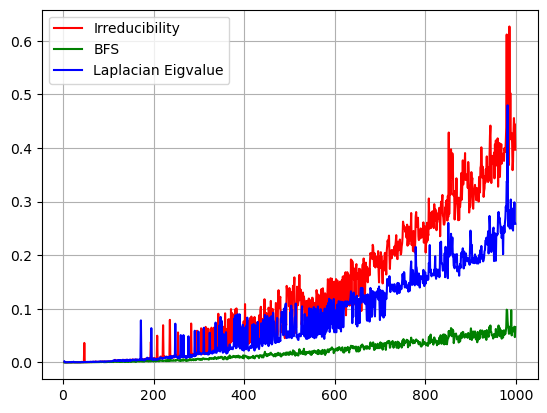

In [7]:
time_irreduc=list()
time_BFS=list()
time_Lapl=list()
Kmax=1000
for K in range(3,Kmax):
    G=g_ER(K,0.2)
    
    start_irr = timeit.default_timer()
    connectivity_irreducible(G)
    stop_irr = timeit.default_timer()
    time_irreduc.append(stop_irr - start_irr) 

    start_BFS = timeit.default_timer()
    check_connectivity_BFS(G,0)
    stop_BFS = timeit.default_timer()
    time_BFS.append(stop_BFS - start_BFS)

    start_Lapl = timeit.default_timer()
    Eig_Lap(G)
    stop_Lapl = timeit.default_timer()
    time_Lapl.append(stop_Lapl - start_Lapl)

    
K=list(range(3,Kmax))
plt.plot(K,time_irreduc,'r',label='Irreducibility')
plt.plot(K,time_BFS,'g',label='BFS')
plt.plot(K,time_Lapl,'b',label='Laplacian Eigvalue')
plt.legend()
plt.grid()
plt.show()

C:\Users\Michele\AppData\Local\Temp\ipykernel_6984\3957628656.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A= nx.adjacency_matrix(G).toarray()


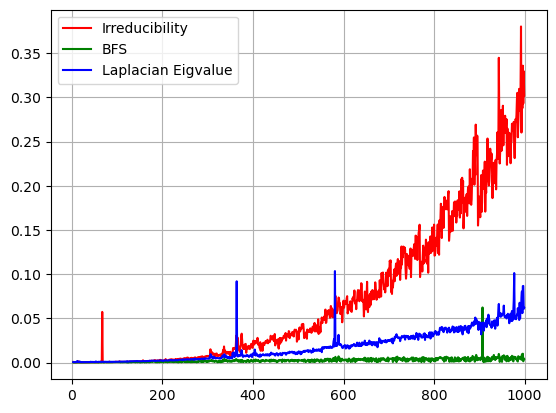

In [8]:
time_irreduc=list()
time_BFS=list()
time_Lapl=list()
Kmax=1000
for K in range(3,Kmax):
    G=g_r(K,2)
    
    start_irr = timeit.default_timer()
    connectivity_irreducible(G)
    stop_irr = timeit.default_timer()
    time_irreduc.append(stop_irr - start_irr) 

    start_BFS = timeit.default_timer()
    check_connectivity_BFS(G,0)
    stop_BFS = timeit.default_timer()
    time_BFS.append(stop_BFS - start_BFS)

    start_Lapl = timeit.default_timer()
    Eig_Lap(G)
    stop_Lapl = timeit.default_timer()
    time_Lapl.append(stop_Lapl - start_Lapl)

    
K=list(range(3,Kmax))
plt.plot(K,time_irreduc,'r',label='Irreducibility')
plt.plot(K,time_BFS,'g',label='BFS')
plt.plot(K,time_Lapl,'b',label='Laplacian Eigvalue')
plt.legend()
plt.grid()
plt.show()

Q4: Let pc (G) denote the probability that a graph G is connected.
By running Monte Carlo simulations, estimate pc (G) and
produce two curve plots:
- pc (G) vs. p for Erd˝os-R´enyi graphs with K = 100;
- pc (G) vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.


In [9]:
def MonteCarlo_ER(sim_p):
    K=50
    data=list()
    for p in np.linspace(0, 1, 100):
        Result_sim=list()
        for i in range(sim_p):
            G=g_ER(K,p)
            Result_sim.append(check_connectivity_BFS(G,0)) 
        data.append((p,np.mean(Result_sim),np.std(Result_sim)))
    data=sorted(data, key=lambda x: x[0])
    return(data)
#######################################################

def MonteCarlo_r(r,sim_K):
    data=list()
    for K in list(range(r+1,101)):
        Result_sim=list()
        for i in range(sim_K):
            G=g_r(K,r)
            Result_sim.append(check_connectivity_BFS(G,0)) 
        data.append((K,np.mean(Result_sim),np.std(Result_sim)))
    data=sorted(data, key=lambda x: x[0]) 
    return(data)


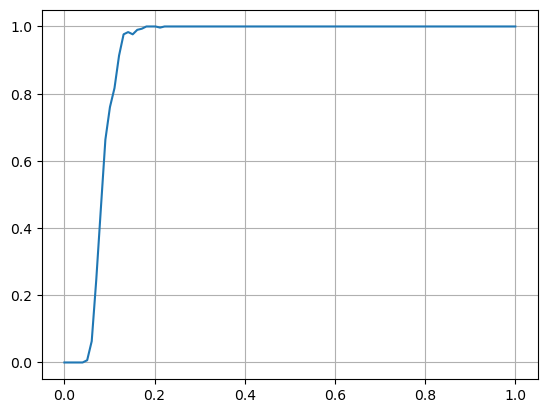

In [10]:
data_ER=MonteCarlo_ER(300)
x_ER=[i[0] for i in data_ER]
y_ER=[i[1] for i in data_ER]
plt.plot(x_ER,y_ER)
plt.grid()

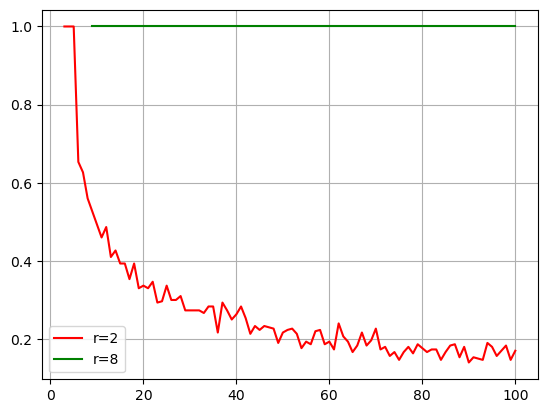

In [11]:
data_r2=MonteCarlo_r(2,300)
x_r2=[i[0] for i in data_r2]
y_r2=[i[1] for i in data_r2]
##############################
data_r8=MonteCarlo_r(8,300)
x_r8=[i[0] for i in data_r8]
y_r8=[i[1] for i in data_r8]

plt.plot(x_r2,y_r2,'r',label='r=2')
plt.plot(x_r8,y_r8,'g',label='r=8')
plt.legend()
plt.grid()
plt.show()

# Part 2

Q1: Give a concise and accurate formal statement of the algorithm
you use to evaluate the mean response time (i.e., how you
conduct the statistical experiment to collect samples of R).


Q2: Plot the mean response time E[R] as a function of N for N
ranging between 1 and 10000.
- Let Rbaseline be the response time in case only server A is used, i.e., the job is run locally on A.
- In the plot normalize E[R] with respect to E[Rbaseline]

In [13]:
def hops_FatTree(i):
    if i in range(1,32):
        return(2)
    elif i in range(32,32*31+1):
        return(4)
    else:
        return(6)
'''
def hops_FatTree(i): #IN CASE WE HAVE TO PASS THROUGH THE CORE LAYER
    return(6)
'''

'\ndef hops_FatTree(i): #IN CASE WE HAVE TO PASS THROUGH THE CORE LAYER\n    return(6)\n'

In [14]:
N=100
T=[2*tau*hops_FatTree(i) for i in range(1,N+1)]
T_reciprocal=[1/t for t in T]
theta_FatTree=[C]
for i in range(1,N):    
    theta_FatTree.append(C*T_reciprocal[i]/np.sum(T_reciprocal[0:(i+1)]))

In [15]:
def ER(N):
    # link capacity in Gbit/s
    C = 10 * (10**9)
    # transmission time of each packet in µs
    tau = 5 * (10**(-6)) 
    T=[2*tau*hops_FatTree(i) for i in range(1,N+1)]
    T_reciprocal=[1/t for t in T]
    theta_FatTree=[C]
    for i in range(1,N):    
        theta_FatTree.append(C*T_reciprocal[i]/np.sum(T_reciprocal[0:(i+1)]))
    
    E_X = 8 * 3600 
    T_0=30
    #runningtime for server i
    Server_time=T_0+E_X/N
    L_f=4 * (10**12) 
    f = 48/1500
    L_f_new=L_f+f*L_f
    #time to transfer data from A into N servers
    data_input_time=[(L_f_new/N)/theta for theta in theta_FatTree]
    L_0=4 * (10**12)
    L_0_mean=L_0/N
    L_0_mean_new=L_0_mean+f*L_0_mean
    #time to transfer data from N servers into A
    data_output_time=[(L_0_mean_new)/theta for theta in theta_FatTree]
    return(sum(data_input_time)/N + sum(data_output_time)/N + Server_time) 

In [20]:
N_max=1000
R_mean=[ER(i) for i in range(1,N_max+1)]
E_R=[j/(30+8*3600) for j in R_mean]

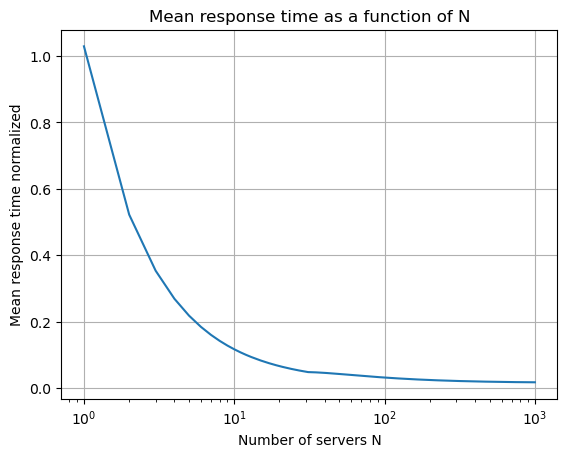

In [21]:
plt.plot(list(range(1,N_max+1)),E_R)
plt.xscale('log')
plt.xlabel('Number of servers N')
plt.ylabel('Mean response time normalized')
plt.title('Mean response time as a function of N')
plt.grid()
plt.show()

Q3) Plot the Job running cost S as a function of N for N ranging
between 1 and 10000.
- Let Sbaseline be the Job running cost in case only server A is used, i.e., the job is run locally on A.
- In the plot normalize S with respect to Sbaseline.

In [23]:
xi = 0.1 
T_0=30
EX=8*3600
E_theta=N*(T_0+EX/N)   
ES=[k+xi*E_theta for k in R_mean]
ES_normalized=[j/(30+8*3600+xi*(30+8*3600)) for j in ES]

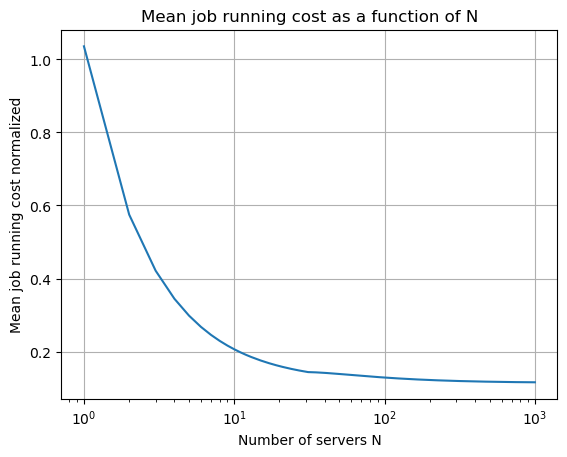

In [24]:
plt.plot(list(range(1,N_max+1)),ES_normalized)
plt.xscale('log')
plt.xlabel('Number of servers N')
plt.ylabel('Mean job running cost normalized')
plt.title('Mean job running cost as a function of N')
plt.grid()
plt.show()